In [1]:
%load_ext autoreload
%autoreload 2
from tools import *
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [2]:
alltxts, all_labs = parse_ftrain_CM()

In [3]:
txt_test = parse_ftest()

In [4]:
text_train, text_test, y_train, y_test = train_test_split(alltxts, \
                                                          all_labs, \
                                                          stratify=all_labs,\
                                                          test_size=0.3,\
                                                          random_state=0)

In [5]:
fr_stopwords = french_stopwords()

Rapport 2013, Romain Ayres (meilleurs scores): (sur le site)http://www-connex.lip6.fr/~guigue/wikihomepage/uploads/Course/Ayres2013.pdf

On cherche à idetifier pour chaque document l'auteur. On va essayer de construire un classifieur binaire qui donne  le label “C” ou “M” à une phrase. Le nombre des phrases dites par "M" sont beaucoup plus faible que ceux dites par “C”, nous évaluerons nos performances avec le score F1.

On considere les mots seperament mot par mot dans cette version

### Version 0 : pas de pré-processing (remove numbers par defaut)

In [6]:
vectorizer0 = build_vectorizer(text_train)
X_train0 = vectorize_docs(vectorizer0, text_train) 
X_test0 = vectorize_docs(vectorizer0, text_test) 

Removing numbers


In [7]:
mean_scores  = []
interval = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3]
for C in interval:
    clf = LinearSVC(C=C,class_weight='balanced')
    scores = cross_val_score(clf, X_train0, y_train, scoring='f1_weighted', cv=10)
    mean_scores.append(np.mean(scores))

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


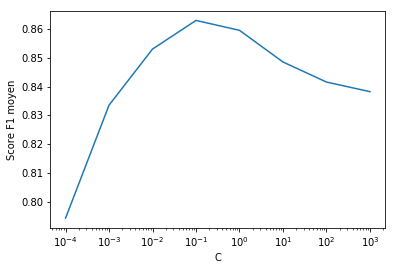

In [8]:
ax = plt.gca()

ax.plot(interval, mean_scores)
ax.set_xscale('log')
plt.xlabel('C')
plt.ylabel('Score F1 moyen')
plt.axis('tight')
plt.show()

In [10]:
C_star = interval[np.argmax(mean_scores)]
clf0 = LinearSVC (C=C_star,class_weight='balanced')
clf0.fit(X_train0, y_train)
y_pred = clf0.predict(X_test0)
f1_score(y_test,y_pred,pos_label=-1, average='binary')

0.53095752339812818

In [31]:
ind_neg = np.argsort(clf0.coef_).flatten()[0:10]
ind_pos = np.argsort(clf0.coef_).flatten()[23980:]

In [34]:
np.sort(clf0.coef_)

array([[-1.1855898 , -1.18286295, -1.12409005, ...,  0.87414693,
         0.91368545,  0.92865121]])

In [32]:
np.array(vectorizer0.get_feature_names())[ind_neg]

array(['archives', 'soviétique', 'intelligences', 'renégociation', 'cnrs',
       'sidérurgie', 'défauts', 'attendant', 'reçus', 'apprennent'],
      dtype='<U22')

In [33]:
np.array(vectorizer0.get_feature_names())[ind_pos]

array(['propose', 'jeu', 'partager', 'insécurité', 'gagne', 'partenariat',
       'probablement', 'mondialisation', 'impressionné', 'euro'],
      dtype='<U22')

In [10]:
clf0 = LinearSVC(C=C_star)
pred0 = eval_on_final_test(vectorizer0, clf0, alltxts, all_labs, txt_test, 0)

### Version 1: en enlevant les stopwords +lowercase

In [14]:
vectorizer1= build_vectorizer(text_train,stopwords=fr_stopwords, b_lowercase=False)
X_train1 = vectorize_docs(vectorizer1, text_train) 
X_test1 = vectorize_docs(vectorizer1, text_test) 

Removing numbers
Keeping uppercase


In [15]:
mean_scores  = []
interval = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3]
for C in interval:
    clf = LinearSVC(C=C,class_weight='balanced')
    scores = cross_val_score(clf, X_train1, y_train, scoring='f1_weighted', cv=10)
    mean_scores.append(np.mean(scores))

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


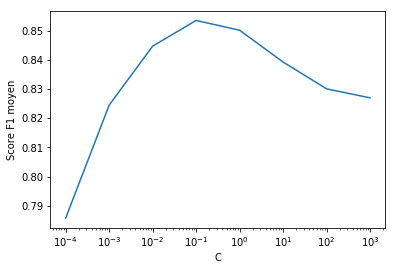

In [16]:
ax = plt.gca()

ax.plot(interval, mean_scores)
ax.set_xscale('log')
plt.xlabel('C')
plt.ylabel('Score F1 moyen')
plt.axis('tight')
plt.show()

In [17]:
C_star = interval[np.argmax(mean_scores)]

clf1 = LinearSVC (C=C_star,class_weight='balanced')
clf1.fit(X_train1, y_train)
y_pred = clf1.predict(X_test1)
f1_score(y_test,y_pred,pos_label=-1, average='binary')

0.51407196294976854

In [15]:
clf1 = LinearSVC(C=C_star)
pred1 = eval_on_final_test(vectorizer1, clf1, alltxts, all_labs, txt_test, 1)

### Version 2a : uppercase /Removing accents/Keeping the top 10000 occurring tokens/removing stopwords

In [18]:
vectorizer2 = build_vectorizer(alltxts,stopwords=fr_stopwords, b_accent=False,\
                                           max_f=10000, b_lowercase=False)
X_train2 = vectorize_docs(vectorizer2, text_train) 
X_test2 = vectorize_docs(vectorizer2, text_test)

Removing numbers
Keeping uppercase
Removing accents
Keeping the top 10000 occurring tokens


In [19]:
mean_scores  = []
interval = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3]
for C in interval:
    clf = LinearSVC(C=C,class_weight='balanced')
    scores = cross_val_score(clf, X_train2, y_train, scoring='f1_weighted', cv=10)
    mean_scores.append(np.mean(scores))

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


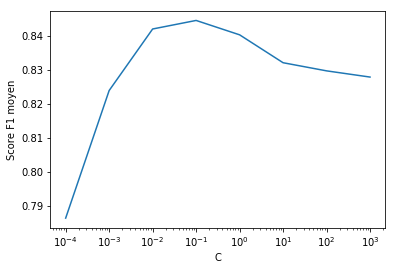

In [20]:
ax = plt.gca()

ax.plot(interval, mean_scores)
ax.set_xscale('log')
plt.xlabel('C')
plt.ylabel('Score F1 moyen')
plt.axis('tight')
plt.show()

In [40]:
C_star = interval[np.argmax(mean_scores)]

clf2 = LinearSVC (C=C_star,class_weight='balanced')
clf2.fit(X_train2, y_train)
y_pred = clf2.predict(X_test2)
f1_score(y_test,y_pred,pos_label=-1, average='binary')

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4196366177498253

In [20]:
clf2 = LinearSVC(C=C_star)
pred2 = eval_on_final_test(vectorizer2, clf2, alltxts, all_labs, txt_test, 2)

### Version 2b : uppercase /Removing accents/Keeping the top 10000 occurring tokens/removing stopwords/stemming

In [42]:
vectorizer2b = build_vectorizer(alltxts,stopwords=fr_stopwords, b_accent=False,\
                                           max_f=10000, b_lowercase=False, b_stemming=True)
X_train2b = vectorize_docs(vectorizer2b, text_train) 
X_test2b = vectorize_docs(vectorizer2b, text_test)

Stemming
Removing numbers
Keeping uppercase
Removing accents
Keeping the top 10000 occurring tokens


In [43]:
mean_scores  = []
interval = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3]
for C in interval:
    clf = LinearSVC(C=C,class_weight='balanced')
    scores = cross_val_score(clf, X_train2b, y_train, scoring='f1_weighted', cv=10)
    mean_scores.append(np.mean(scores))

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


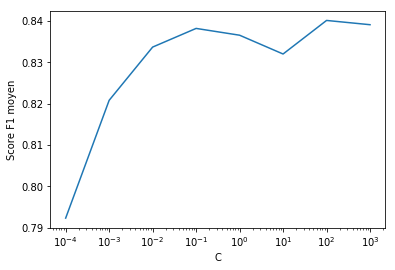

In [44]:
ax = plt.gca()

ax.plot(interval, mean_scores)
ax.set_xscale('log')
plt.xlabel('C')
plt.ylabel('Score F1 moyen')
plt.axis('tight')
plt.show()

In [45]:
C_star = interval[np.argmax(mean_scores)]

clf2b = LinearSVC (C=C_star,class_weight='balanced')
clf2b.fit(X_train2b, y_train)
y_pred = clf2.predict(X_test2b)
f1_score(y_test,y_pred,pos_label=-1, average='binary')

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.15742024965325938

### Version 3 : Ajouter de post processing pour enlever les elements isolés

In [21]:

f = open("testfile_v1.txt", "r")
s=f.read()
s = s.replace("\n","").replace("MMCMM","MMMMM").replace("CCMCC","CCCCC")\
                                        .replace("MCM","MMM").replace("CMC","CCC").replace("MCCM","MMMM")
f = open("testfile_v3.txt", "w")
f.write("\n".join(list(s))+"\n")
f.close()

On utilise un svm lineaire comme modele dont on cherche le parametre optimal par une cross-validation.
Les classes n’étant pas équilibréesdans le jeu d’apprentissage, on se sert de stratified cross validation afin que les individus de chaque classe soient bien répartis .

Décrire les prétraitements faits à chaque fois

## Version 4 : remove numbers + 2-grammes

In [44]:
vectorizer4 = build_vectorizer(text_train,n=(2,2))
X_train4 = vectorize_docs(vectorizer4, text_train) 
X_test4 = vectorize_docs(vectorizer4, text_test) 

Removing numbers


In [45]:
vectorizer4.get_feature_names()

['abaissant les',
 'abaissement des',
 'abaissement du',
 'abaissement la',
 'abaisser de',
 'abaisser le',
 'abaisser les',
 'abaisser nos',
 'abaissé méconnu',
 'abandon abaissement',
 'abandon de',
 'abandon des',
 'abandon devant',
 'abandon dont',
 'abandon du',
 'abandon elle',
 'abandon et',
 'abandon la',
 'abandon le',
 'abandon par',
 'abandon pourrait',
 'abandonne au',
 'abandonne automobile',
 'abandonne la',
 'abandonne pas',
 'abandonnent certaines',
 'abandonnent des',
 'abandonner action',
 'abandonner afrique',
 'abandonner au',
 'abandonner elle',
 'abandonner en',
 'abandonner idée',
 'abandonner la',
 'abandonner les',
 'abandonner ou',
 'abandonner ses',
 'abandonner trois',
 'abandonnerai donc',
 'abandonnons pas',
 'abandonné au',
 'abandonné ce',
 'abandonné le',
 'abandonné leur',
 'abandonnée ou',
 'abandonnée sauf',
 'abandonnées autres',
 'abandonnés eux',
 'abandonnés leurs',
 'abandonnés parce',
 'abat par',
 'abattage de',
 'abattage des',
 'abattage qui

In [46]:
mean_scores  = []
interval = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3]
for C in interval:
    clf = LinearSVC(C=C,class_weight='balanced')
    scores = cross_val_score(clf, X_train4, y_train, scoring='f1_weighted', cv=10)
    mean_scores.append(np.mean(scores))

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


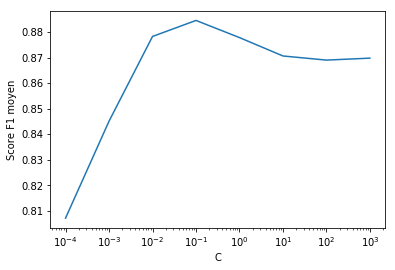

In [47]:
ax = plt.gca()

ax.plot(interval, mean_scores)
ax.set_xscale('log')
plt.xlabel('C')
plt.ylabel('Score F1 moyen')
plt.axis('tight')
plt.show()

In [48]:
C_star = interval[np.argmax(mean_scores)]
clf4 = LinearSVC (C=C_star,class_weight='balanced')
clf4.fit(X_train4, y_train)
y_pred = clf4.predict(X_test4)
f1_score(y_test,y_pred,pos_label=-1, average='binary')

0.51462593838985249

In [49]:
ind_neg = np.argsort(clf4.coef_).flatten()[0:10]
ind_pos = np.argsort(clf4.coef_).flatten()[clf4.coef_.shape[1]-10:]

print(np.array(vectorizer4.get_feature_names())[ind_neg])
print(np.array(vectorizer4.get_feature_names())[ind_pos])

['suite sur' 'date date' 'mais enfin' 'solidarité économique' 'après tout'
 'quelques autres' 'une façon' 'quand même' 'très bien' 'sont légion']
['une solution' 'naturellement il' 'outre mer' 'nos compatriotes'
 'mesdames messieurs' 'vous remercie' 'crois pas'
 'communauté internationale' 'la mondialisation' 'bien sûr']


In [51]:
np.array(vectorizer4.get_feature_names())[ind_pos]

array(['une solution', 'naturellement il', 'outre mer', 'nos compatriotes',
       'mesdames messieurs', 'vous remercie', 'crois pas',
       'communauté internationale', 'la mondialisation', 'bien sûr'],
      dtype='<U36')

In [27]:
clf4 = LinearSVC(C=C_star)
pred4 = eval_on_final_test(vectorizer4, clf4, alltxts, all_labs, txt_test, 4)

## Version 5 : remove numbers + 3-grammes

In [35]:
vectorizer5 = build_vectorizer(text_train,n=(3,3))
X_train5 = vectorize_docs(vectorizer5, text_train) 
X_test5 = vectorize_docs(vectorizer5, text_test) 

Removing numbers


In [ ]:
vectorizer5.get_feature_names()

['abaissant les bras',
 'abaissement des coûts',
 'abaissement du coût',
 'abaissement la servitude',
 'abaisser de préserver',
 'abaisser le coût',
 'abaisser le poids',
 'abaisser les charges',
 'abaisser les coûts',
 'abaisser les prix',
 'abaisser nos impôts',
 'abaissé méconnu dès',
 'abandon de chacun',
 'abandon de etat',
 'abandon de la',
 'abandon de leur',
 'abandon de soi',
 'abandon de solitude',
 'abandon de tout',
 'abandon de trahison',
 'abandon des essais',
 'abandon devant la',
 'abandon dont souffrent',
 'abandon du salaire',
 'abandon du système',
 'abandon elle attaque',
 'abandon et de',
 'abandon et du',
 'abandon la fatalité',
 'abandon le champ',
 'abandon par la',
 'abandon pourrait jamais',
 'abandonne au point',
 'abandonne automobile ou',
 'abandonne la plus',
 'abandonne pas leur',
 'abandonnent certaines incriminations',
 'abandonnent des considérations',
 'abandonnent des morceaux',
 'abandonner action civique',
 'abandonner afrique serait',
 'abandonner

In [36]:
mean_scores  = []
interval = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3]
for C in interval:
    clf = LinearSVC(C=C,class_weight='balanced')
    scores = cross_val_score(clf, X_train5, y_train, scoring='f1_weighted', cv=10)
    mean_scores.append(np.mean(scores))

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


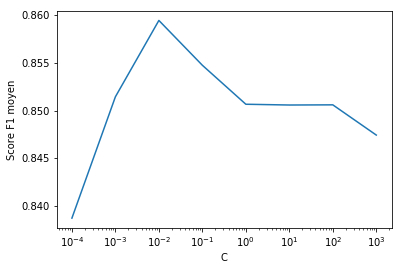

In [37]:
ax = plt.gca()

ax.plot(interval, mean_scores)
ax.set_xscale('log')
plt.xlabel('C')
plt.ylabel('Score F1 moyen')
plt.axis('tight')
plt.show()

In [38]:
C_star = interval[np.argmax(mean_scores)]

clf5 = LinearSVC (C=C_star,class_weight='balanced')
clf5.fit(X_train5, y_train)
y_pred = clf5.predict(X_test5)
f1_score(y_test,y_pred,pos_label=-1, average='binary')

0.3901386748844376

In [41]:
ind_neg = np.argsort(clf5.coef_).flatten()[0:10]
ind_pos = np.argsort(clf5.coef_).flatten()[clf5.coef_.shape[1]-10:]

print(np.array(vectorizer5.get_feature_names())[ind_neg])
print(np.array(vectorizer5.get_feature_names())[ind_pos])

['en tout cas' 'etats unis amérique' 'je me souviens' 'je pense que'
 'ici et là' 'il faut que' 'de la communauté' 'je veux dire' 'ce est pas'
 'il faut bien']
['est aussi une' 'de la mondialisation' 'dans notre pays'
 'de union européenne' 'que nous devons' 'plus que jamais'
 'la communauté internationale' 'tous les français' 'au service de'
 'et messieurs les']


In [43]:
np.array(vectorizer5.get_feature_names())[ind_pos]

array(['est aussi une', 'de la mondialisation', 'dans notre pays',
       'de union européenne', 'que nous devons', 'plus que jamais',
       'la communauté internationale', 'tous les français',
       'au service de', 'et messieurs les'],
      dtype='<U49')

In [33]:
clf5 = LinearSVC(C=C_star)
pred5 = eval_on_final_test(vectorizer5, clf5, alltxts, all_labs, txt_test, 5)

## Version 6 : uppercase /Removing accents/Keeping the top 10000 occurring tokens/removing stopwords   3-grammes

In [32]:
vectorizer6 = build_vectorizer(alltxts,stopwords=fr_stopwords,\
                         b_lowercase=False, b_accent=False,\
                                           max_f=10000,n=(2,2))
X_train6 = vectorize_docs(vectorizer6, text_train) 
X_test6 = vectorize_docs(vectorizer6, text_test)

Removing numbers
Keeping uppercase
Removing accents
Keeping the top 10000 occurring tokens


In [33]:
mean_scores  = []
interval = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3]
for C in interval:
    clf = LinearSVC(C=C,class_weight='balanced')
    scores = cross_val_score(clf, X_train6, y_train, scoring='f1_weighted', cv=10)
    mean_scores.append(np.mean(scores))

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


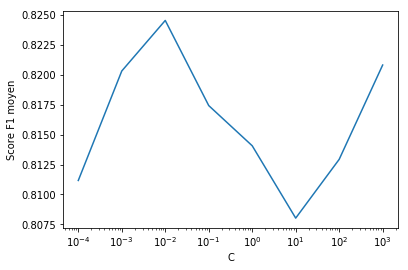

In [34]:
ax = plt.gca()

ax.plot(interval, mean_scores)
ax.set_xscale('log')
plt.xlabel('C')
plt.ylabel('Score F1 moyen')
plt.axis('tight')
plt.show()

In [37]:
C_star = interval[np.argmax(mean_scores)]

clf6 = LinearSVC (C=C_star,class_weight='balanced')
clf6.fit(X_train5, y_train)
y_pred = clf5.predict(X_test5)
f1_score(y_test,y_pred,pos_label=-1, average='binary')

0.22361710474695956

In [38]:
clf6 = LinearSVC(C=C_star)
pred6 = eval_on_final_test(vectorizer6, clf6, alltxts, all_labs, txt_test, 6)

les ngram consiste à prendre des tuples  de n mots consécutifs. Le nombre de dimension augmente très rapidement avec la taille des n-gram, ce qui dégrade la performance de modéle . ( je pense )